# Modelo de Red Neuronal para Parcial 3

Los datos entregados por el modelo ```población y consumo de alcohol``` 

In [1]:
# Importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data_pot.csv',
                 skiprows=1,
                 names=[' ', ' One', 'UrbanP', 'LateB', 'WineC', 'LiquorC','CDR'],
                 na_values=['?'],
                 index_col=[' '])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 46
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    One     46 non-null     int64  
 1   UrbanP   46 non-null     int64  
 2   LateB    46 non-null     float64
 3   WineC    46 non-null     int64  
 4   LiquorC  46 non-null     int64  
 5   CDR      46 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 2.5 KB


### Data Potencia: Entrenamiento - Validacion 

In [5]:
train_1, test_1 = train_test_split(data, test_size = 0.30)
train_1.to_csv('train_pot.csv')
test_1.to_csv('test_pot.csv')

### Modelo


Vamos a predecir la ```CDR``` teniendo como entrada todas las variables.

### Entrenar con las 4 columnas 

Comenzando entrenamiento ... 
Modelo entranado!


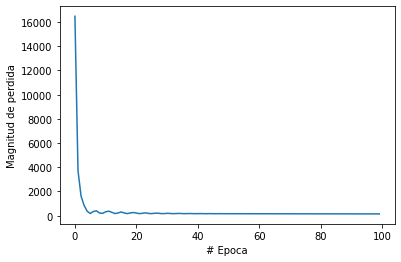

In [23]:
a1 = train_1['UrbanP']
a2 = train_1['LateB']
a3 = train_1['WineC']
a4 = train_1['LiquorC']

entrada = np.array(np.column_stack((a1,a2,a3,a4)), dtype='float')

p = train_1['CDR']

##############################################################

salida = np.array(np.transpose(p), dtype='float')
oculta1 = tf.keras.layers.Dense(units=5, input_shape=[4])
oculta2 = tf.keras.layers.Dense(units=2)
oculta3 = tf.keras.layers.Dense(units=2)
oculta4 = tf.keras.layers.Dense(units=2)
output = tf.keras.layers.Dense(units=1)

###############################################################
modelo = tf.keras.Sequential([oculta1,  oculta2, oculta3,  oculta4, output])
###############################################################

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)
###############################################################

print("Comenzando entrenamiento ... ")
historial = modelo.fit(entrada,salida, epochs=100, verbose=False)
print("Modelo entranado!")
###############################################################
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [27]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(oculta3.get_weights())
print(oculta4.get_weights())
print(output.get_weights())

Variables internas del modelo
[array([[-0.5981066 ,  1.3173134 ,  0.03321612, -0.331444  ,  0.74674237],
       [-0.9385535 ,  1.4096887 , -1.408351  , -1.205198  ,  0.1032872 ],
       [-1.079467  ,  1.1575068 , -1.3256963 , -0.96577114,  1.4014134 ],
       [-1.124119  ,  0.19543718,  0.00513292, -0.36277315,  0.78087807]],
      dtype=float32), array([-0.76595104,  0.6914713 , -0.7933956 , -0.75815916,  0.5201491 ],
      dtype=float32)]
[array([[ 0.9973092 , -1.6132444 ],
       [-1.6985945 ,  1.1146846 ],
       [-0.5351129 ,  0.24716382],
       [ 0.1313606 ,  0.02599792],
       [-0.8021603 , -0.68905056]], dtype=float32), array([-0.7026665 ,  0.80994594], dtype=float32)]
[array([[-0.28271946,  0.60010403],
       [-0.59912133,  0.24925296]], dtype=float32), array([-0.8249285 , -0.74712235], dtype=float32)]
[array([[-0.01148756, -0.1170872 ],
       [-0.8556712 , -0.02037659]], dtype=float32), array([0.72271085, 0.8682301 ], dtype=float32)]
[array([[ 0.36491808],
       [-0.0186

In [29]:
# Modelo
w1 = np.array([[ -0.5981066 ,  1.3173134 ,  0.03321612, -0.331444  ,  0.74674237],
       [-0.9385535 ,  1.4096887 , -1.408351  , -1.205198  ,  0.1032872 ],
       [-1.079467  ,  1.1575068 , -1.3256963 , -0.96577114,  1.4014134 ],
       [-1.124119  ,  0.19543718,  0.00513292, -0.36277315,  0.78087807]],
      dtype='float')
b1 = np.array([-0.76595104,  0.6914713 , -0.7933956 , -0.75815916,  0.5201491 ],
      dtype='float')
w2 = np.array([[ 0.9973092 , -1.6132444 ],
       [-1.6985945 ,  1.1146846 ],
       [-0.5351129 ,  0.24716382],
       [ 0.1313606 ,  0.02599792],
       [-0.8021603 , -0.68905056]], dtype='float')
b2 = np.array([-0.7026665 ,  0.80994594], dtype='float')
w3 = np.array([[-0.28271946,  0.60010403],
       [-0.59912133,  0.24925296]], dtype='float')
b3 = np.array([-0.8249285 , -0.74712235], dtype='float')

w4 = np.array([[-0.01148756, -0.1170872 ],
       [-0.8556712 , -0.02037659]], dtype='float')
b4 = np.array([0.72271085, 0.8682301 ], dtype='float')

w5 = np.array([[ 0.36491808],
       [-0.01860785]], dtype='float')
b5 = np.array([0.64554816], dtype='float')




In [30]:
test_1.head()

,One,UrbanP,LateB,WineC,LiquorC,CDR
,,,,,,
28,1,52,43.8,6,46,40.1
39,1,85,56.1,23,74,97.5
13,1,36,36.9,10,48,53.1
42,1,37,32.4,2,41,29.7
41,1,84,50.0,16,63,90.5


In [31]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 28 to 2
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    One     14 non-null     int64  
 1   UrbanP   14 non-null     int64  
 2   LateB    14 non-null     float64
 3   WineC    14 non-null     int64  
 4   LiquorC  14 non-null     int64  
 5   CDR      14 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 784.0 bytes


In [51]:
# VALIDACION 

pot_pred = []  # Prediccion de Potencias CDR
errorAb = [] # Error absoluto de cada prediccion

for i in range(14):
  U = test_1.iloc[i]['UrbanP']
  L = test_1.iloc[i]['LateB']
  W = test_1.iloc[i]['WineC']
  I = test_1.iloc[i]['LiquorC']
  entrada = np.array([[U,L,W,I]], dtype='float')
  x1 = entrada.dot(w1) + b1
  x2 = x1.dot(w2) + b2
  x3 = x2.dot(w3) + b3
  x4= x3.dot(w4) + b4
  x5= x4.dot(w5)+ b5 
  pot_pred.append(float(x5))

for i in range(14):
  error = 100*(abs(test_1.iloc[i]['CDR'] - pot_pred[i])/test_1.iloc[i]['CDR'])
  errorAb.append(error)

test_1["Pot Pred"] = pot_pred
test_1["Error %"] = errorAb

test_1

,One,UrbanP,LateB,WineC,LiquorC,CDR,Pot Pred,Error %
,,,,,,,,
28,1,52,43.8,6,46,40.1,58.213362,45.170478
39,1,85,56.1,23,74,97.5,95.957422,1.582131
13,1,36,36.9,10,48,53.1,50.611618,4.686218
42,1,37,32.4,2,41,29.7,43.370490,46.028585
41,1,84,50.0,16,63,90.5,86.589910,4.320541
14,1,47,38.9,10,69,55.4,62.775822,13.313758
19,1,33,31.2,6,27,37.6,39.138909,4.092842
12,1,65,32.1,12,33,34.3,60.525482,76.459131
9,1,70,45.6,12,56,77.2,73.953905,4.204786


(array([6., 3., 0., 1., 0., 2., 1., 0., 0., 1.]),
 array([ 1.5821315 ,  9.06983141, 16.55753131, 24.04523122, 31.53293113,
        39.02063104, 46.50833094, 53.99603085, 61.48373076, 68.97143067,
        76.45913057]),
 <a list of 10 Patch objects>)

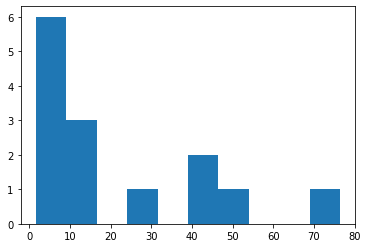

In [52]:
# Graficamos el error
plt.hist(test_1['Error %'])

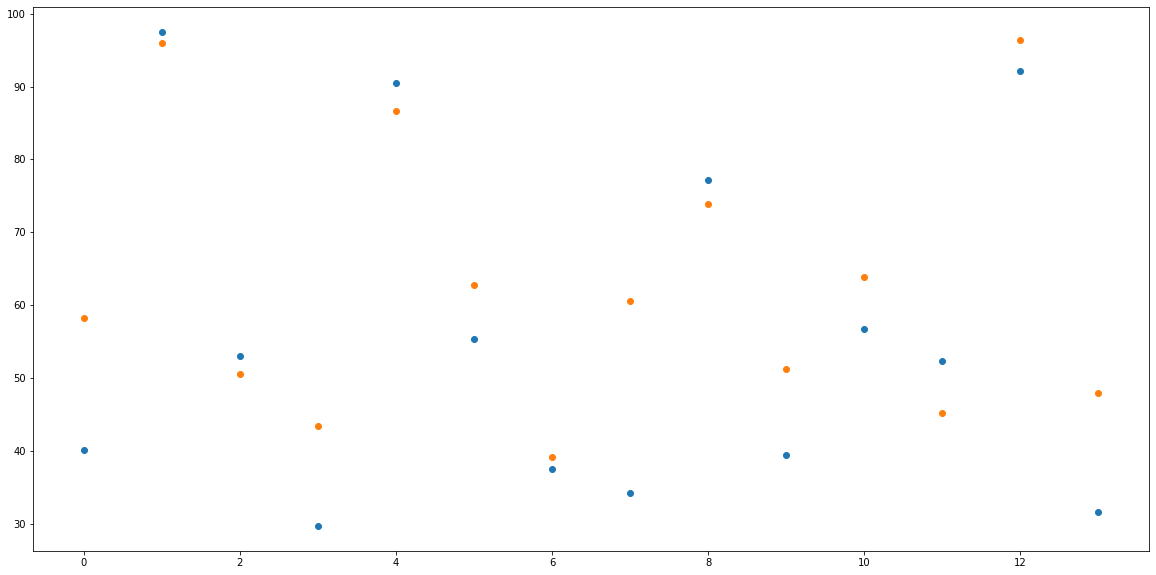

In [56]:
x = []
for i in range(14):
  x.append(i)

plt.figure(figsize=(20,10))
plt.scatter(x,test_1['CDR'])
plt.scatter(x,test_1['Pot Pred'])

Podemos analizar que ésta red no nos permite con las iteraciones asignadas un modelo en el que podamos confiar 
en gran medida. Se presenta un margen de error en el modelo B = A0 * X0 + A1 * X1 + A2 * X2 + A3 * X3 + A4 * X4 que
se intenta predecir